#Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the libraries and Load csv file in to DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
#from datetime import datetime

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project Folder/netflix_titles.csv")
df.shape

(8807, 12)

#Data Validation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


As we observed above, there are 6 columns contain missing values.


In case of the text columns like ("director", "cast" & "country"), we will fill the missing values with "Unknown" values. 

In [6]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna(value="unknown")

About the other columns contain null values, we will drop them because the null values only occupy a small amount of total dataset.

In [7]:
df.dropna(subset=['date_added', 'duration', 'rating'], inplace=True)
df.shape

(8790, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


#Data Cleaning


Change date columns to datetime data type.

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])
print(df['date_added'].dtypes)

datetime64[ns]


The duration column contain two types of time data: minutes and seasons. Let's split it into two seperate columns for further analysis.

In [10]:
df['duration_min'] = pd.to_numeric(df.apply(lambda x: x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis=1))
df['duration_ss'] = pd.to_numeric(df.apply(lambda x: x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis=1))
df.drop(columns=['duration'], inplace=True)

The values in rating column show us which type of ages the Movie/TV Show suitable for. For instance, the TV-MA rating means that this is a Adult content and only suitable for people over 18. We will create a column to indicate this.

In [11]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_ages)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  description   8790 non-null   object        
 11  duration_min  6126 non-null   float64       
 12  duration_ss   2664 non-null   float64       
 13  target_age    8790 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


#Exploratory Data Analysis


### Compare Movie and TV Show ratio


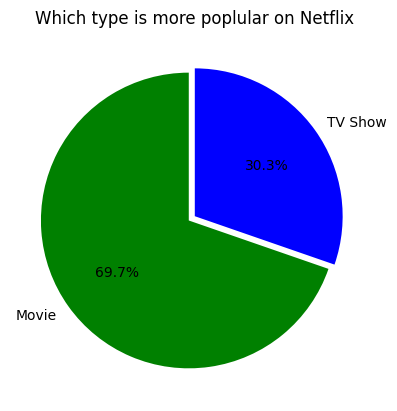

In [13]:
# Count number of content for each type.
catalouge = df['type'].value_counts()

# Create a pie chart
plt.pie(catalouge, labels=catalouge.index, colors=['green', 'blue'], explode=[0.05, 0], startangle=90, autopct='%.1f%%')
plt.title('Which type is more poplular on Netflix')
plt.show()


### Most Popular Movie Genres on Netflix

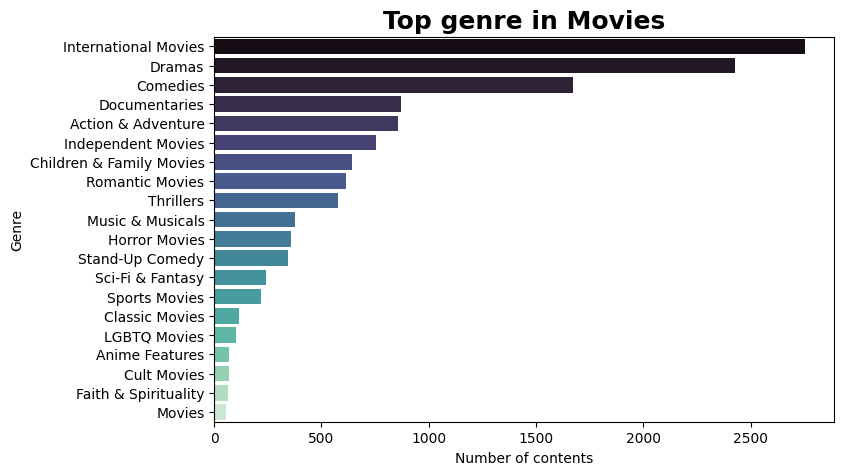

In [14]:
# Extract genre from listed_in columns and use Counter to count the absence of each genre.
movie_genre = ", ".join(df[df['type']=='Movie']['listed_in']).split(", ")
counter_list = Counter(movie_genre).most_common()
movie_genre_df = pd.DataFrame(counter_list)
movie_genre_df.columns = ['genre', 'count']

# Create a barplot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=movie_genre_df, y='genre', x='count', orient='h', palette='mako')
ax.set_title('Top genre in Movies', fontweight='bold', fontsize=18)
ax.set_ylabel('Genre')
ax.set_xlabel('Number of contents')
plt.show()

### Most Popular TV Show Genres on Netflix

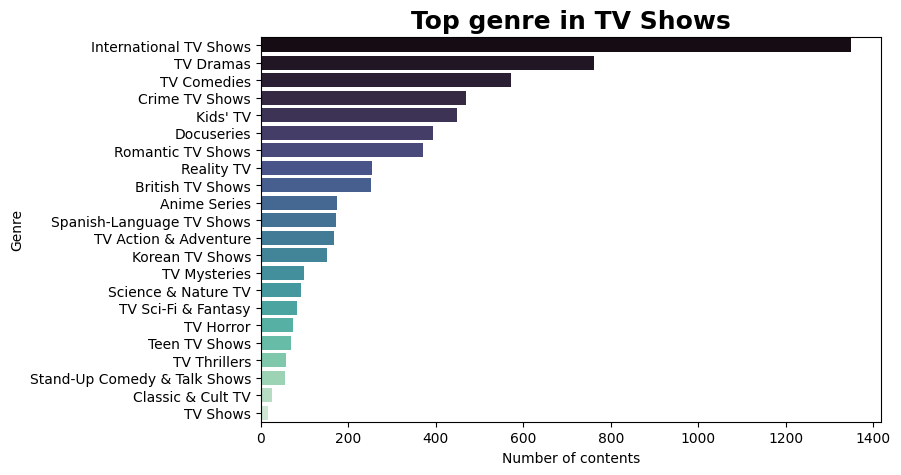

In [17]:
# Extract genre from listed_in columns and use Counter to count the absence of each genre.
tv_genre = ", ".join(df[df['type']=='TV Show']['listed_in']).split(", ")
counter_list = Counter(tv_genre).most_common()
tv_genre_df = pd.DataFrame(counter_list)
tv_genre_df.columns = ['genre', 'count']

# Create a barplot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=tv_genre_df, y='genre', x='count', orient='h', palette='mako')
ax.set_title('Top genre in TV Shows', fontweight='bold', fontsize=18)
ax.set_ylabel('Genre')
ax.set_xlabel('Number of contents')
plt.show()

### Top Countries contributor on Netflix

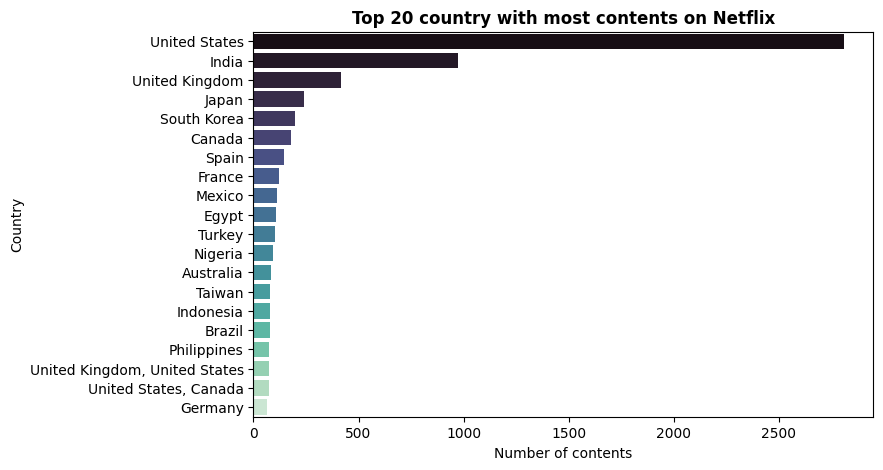

In [18]:
# Create a DataFrame contain number of contents for each country.
content_per_country = df[df['country'] != 'unknown']['country'].value_counts().reset_index()
content_per_country = content_per_country.rename(columns={'index':'country', 'country':'count'}).sort_values('count', ascending=False).head(20)

# Create a barchart
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=content_per_country, y='country', x='count', orient='h', palette='mako')
ax.set_title('Top 20 country with most contents on Netflix', fontweight='bold')
ax.set_ylabel('Country')
ax.set_xlabel('Number of contents')
plt.show()

### Top 5 genres in United States and India movies.

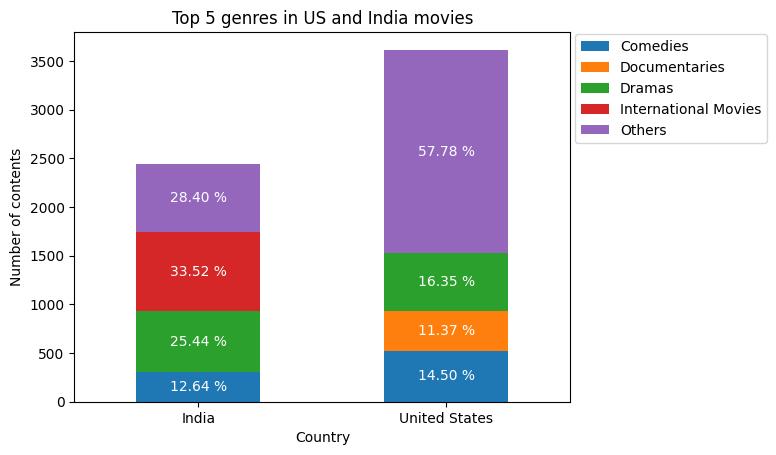

In [138]:
# Create the table contains count of contents for each genres in US
us_movie = df[(df['type']=='Movie') & (df['country']=='United States')]
us_movie_genre = ", ".join(us_movie['listed_in']).split(", ")
counter_list = Counter(us_movie_genre).most_common()
us_movie_genre_df = pd.DataFrame(counter_list)
us_movie_genre_df.columns = ['genre', 'count']
us_movie_genre_df.sort_values('count', ascending=False)
other_genre = pd.DataFrame({'genre':'Others', 'count':[us_movie_genre_df.iloc[3:, 1].sum()]})
us_movie_genre_df = pd.concat([us_movie_genre_df.loc[:2, ], other_genre], ignore_index=True)
us_movie_genre_df


# Create the table contains count of contents for each genres in US
ind_movie = df[(df['type']=='Movie') & (df['country']=='India')]
ind_movie_genre = ", ".join(ind_movie['listed_in']).split(", ")
counter_list = Counter(ind_movie_genre).most_common()
ind_movie_genre_df = pd.DataFrame(counter_list)
ind_movie_genre_df.columns = ['genre', 'count']
ind_movie_genre_df.sort_values('count', ascending=False)
other_genre = pd.DataFrame({'genre':'Others', 'count':[ind_movie_genre_df.iloc[3:, 1].sum()]})
ind_movie_genre_df = pd.concat([ind_movie_genre_df.loc[:2, ], other_genre], ignore_index=True)
ind_movie_genre_df

# Add a column contain name of country for two tables.
us_movie_genre_df['country'] = ['United States' for i in range(us_movie_genre_df.shape[0])]
ind_movie_genre_df['country'] = ["India" for i in range(ind_movie_genre_df.shape[0])]

# Merge two DataFrames and turn it into pivot table for visualization.
us_ind_movie = pd.concat([us_movie_genre_df, ind_movie_genre_df], ignore_index=True)
us_ind_movie = us_ind_movie.pivot(index='country', columns='genre', values='count')
us_ind_movie = us_ind_movie.reset_index().fillna(0)

# Create a stacked bar chart for top 5 genres in each country.
ax = us_ind_movie.plot(x='country', kind='bar', stacked=True)
ax.set(xlabel='Country', ylabel='Number of contents', title='Top 5 genres in US and India movies')
plt.legend(loc=(1.01, 0.7))
plt.xticks(rotation=0)
total = us_ind_movie[us_ind_movie.columns[1:]].sum(axis=1)

for p in ax.patches:
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    if h in us_ind_movie.iloc[0].values[1:] and h!=0.0:
      text = f'{h/total[0] * 100:0.2f} %'
      ax.annotate(text=text, xy=(x + w / 2, y + h / 2), ha='center', va='center', color='white', size=10)
    elif h in us_ind_movie.iloc[1].values[1:] and h!=0.0:
      text = f'{h/total[1] * 100:0.2f} %'
      ax.annotate(text=text, xy=(x + w / 2, y + h / 2), ha='center', va='center', color='white', size=10)

plt.show()


###Who are the top 10 Movies actors on Netflix based on number of titles?

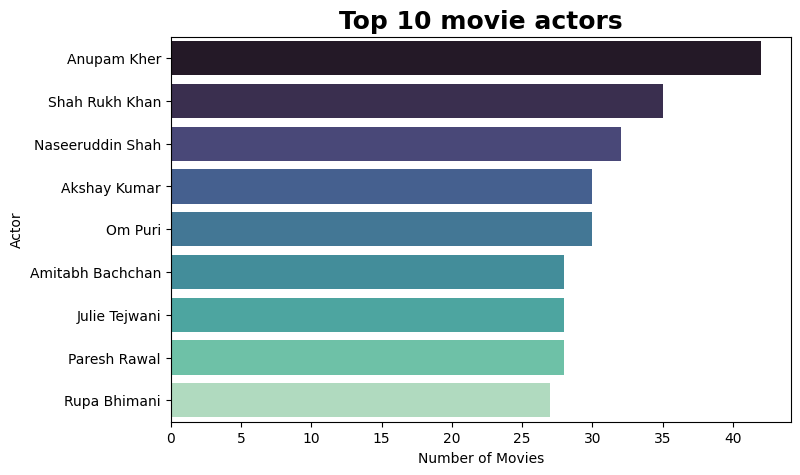

In [19]:
# Extract actors from cast columns and use Counter to count the absences of each actor.
movie_actor = ", ".join(df[df['type']=='Movie']['cast']).split(", ")
counter_list = Counter(movie_actor).most_common(10)
movie_actor_df = pd.DataFrame(counter_list)
movie_actor_df.columns = ['actor', 'count']
movie_actor_df = movie_actor_df[movie_actor_df['actor']!='unknown']
movie_actor_df

# Create a barchart
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=movie_actor_df, y='actor', x='count', orient='h', palette='mako')
ax.set_title('Top 10 movie actors', fontweight='bold', fontsize=18)
ax.set_ylabel('Actor')
ax.set_xlabel('Number of Movies')
plt.show()

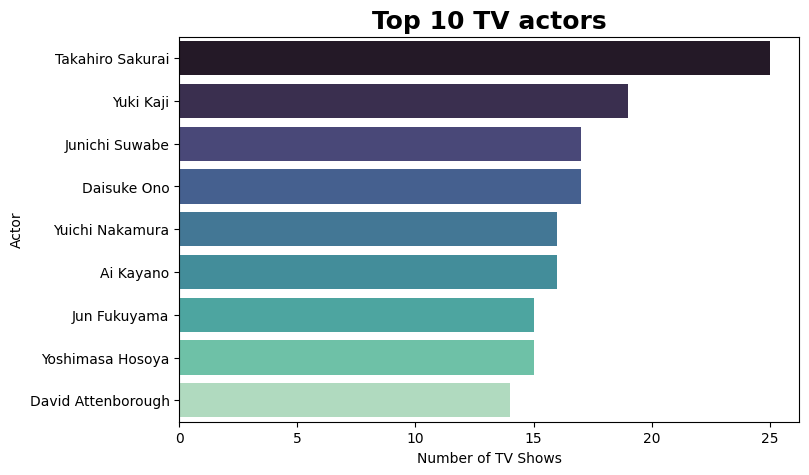

In [20]:
# Extract actors from cast columns and use Counter to count the absences of each actor.
TV_actor = ", ".join(df[df['type']=='TV Show']['cast']).split(", ")
counter_list = Counter(TV_actor).most_common(10)
TV_actor_df = pd.DataFrame(counter_list)
TV_actor_df.columns = ['actor', 'count']
TV_actor_df = TV_actor_df[TV_actor_df['actor']!='unknown']

# Create a barchart
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=TV_actor_df, y='actor', x='count', orient='h', palette='mako')
ax.set_title('Top 10 TV actors', fontweight='bold', fontsize=18)
ax.set_ylabel('Actor')
ax.set_xlabel('Number of TV Shows')
plt.show()

### Who are the top 10 directors on Netflix with the most releases?

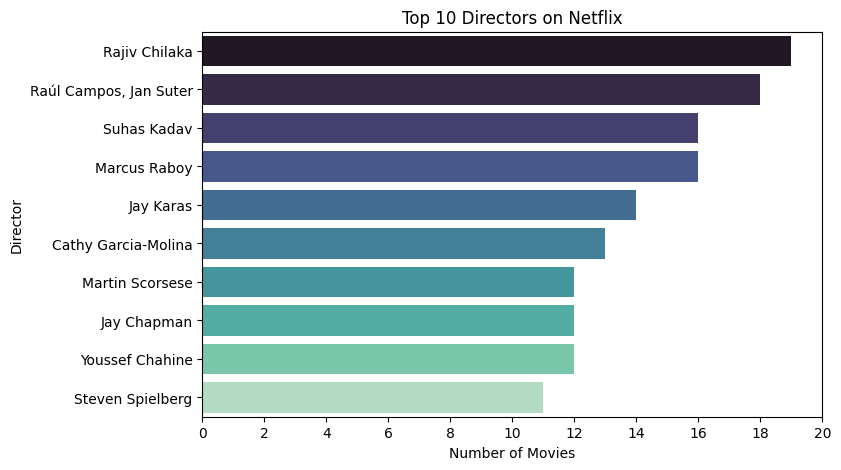

In [21]:
# Create a DataFrame contain top 20 director have most movies in USA.
usa_dir = df['director'].value_counts().reset_index().rename(columns={'index':'director', 'director':'count'})
usa_dir_top20 = usa_dir[usa_dir['director']!='unknown'].head(10)

# Create a bar plot.
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=usa_dir_top20, y='director', x='count', orient='h', palette='mako')
ax.set_title('Top 10 Directors on Netflix')
ax.set_ylabel('Director')
ax.set_xlabel('Number of Movies')
ax.set_xlim(0, 20)
ax.set_xticks(np.linspace(0, 20, 11))
plt.show()

### Distribution of Movie Durations.

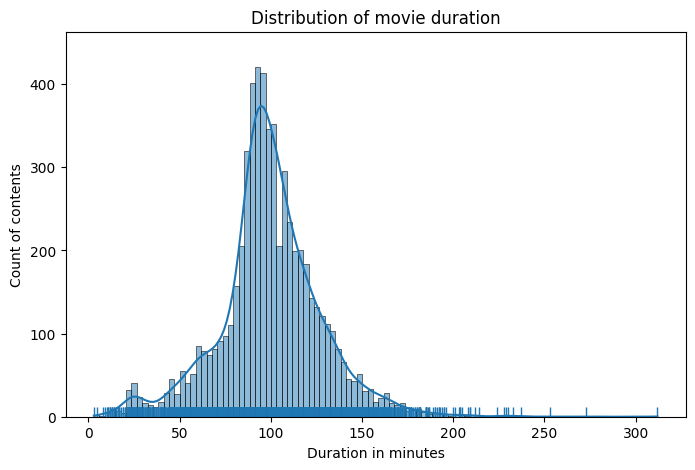

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['duration_min'], kde=True)
sns.rugplot(df['duration_min'])
ax.set(xlabel='Duration in minutes', ylabel='Count of contents', title='Distribution of movie duration')
plt.show()

### Distribution of TV Shows duration

In [23]:
# Create a table of TV show durations.
show_duration = df['duration_ss'].value_counts().reset_index().rename(columns={'index':'num_of_ss', 'duration_ss':'count'})
show_duration

,num_of_ss,count
0,1.0,1791
1,2.0,421
2,3.0,198
3,4.0,94
4,5.0,64
5,6.0,33
6,7.0,23
7,8.0,17
8,9.0,9
9,10.0,6


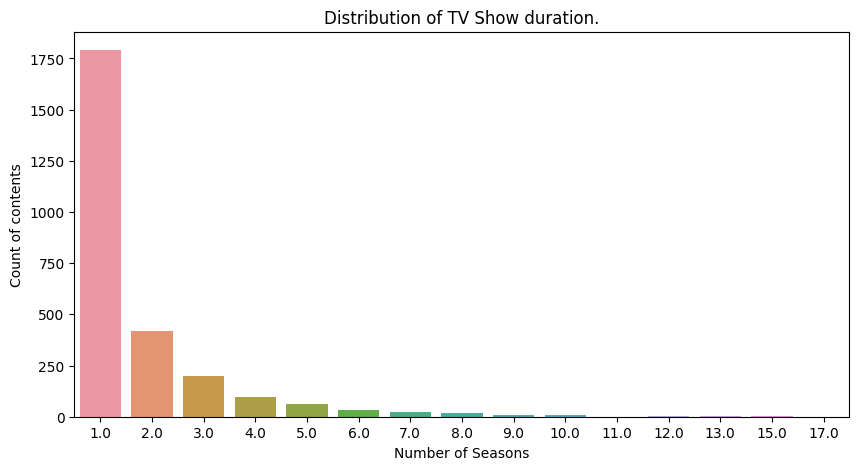

In [24]:
# Create a barplot 
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=show_duration, x='num_of_ss', y='count')
ax.set(xlabel='Number of Seasons', ylabel='Count of contents', title='Distribution of TV Show duration.')
plt.show()

###Netflix content By Ratings for Movies

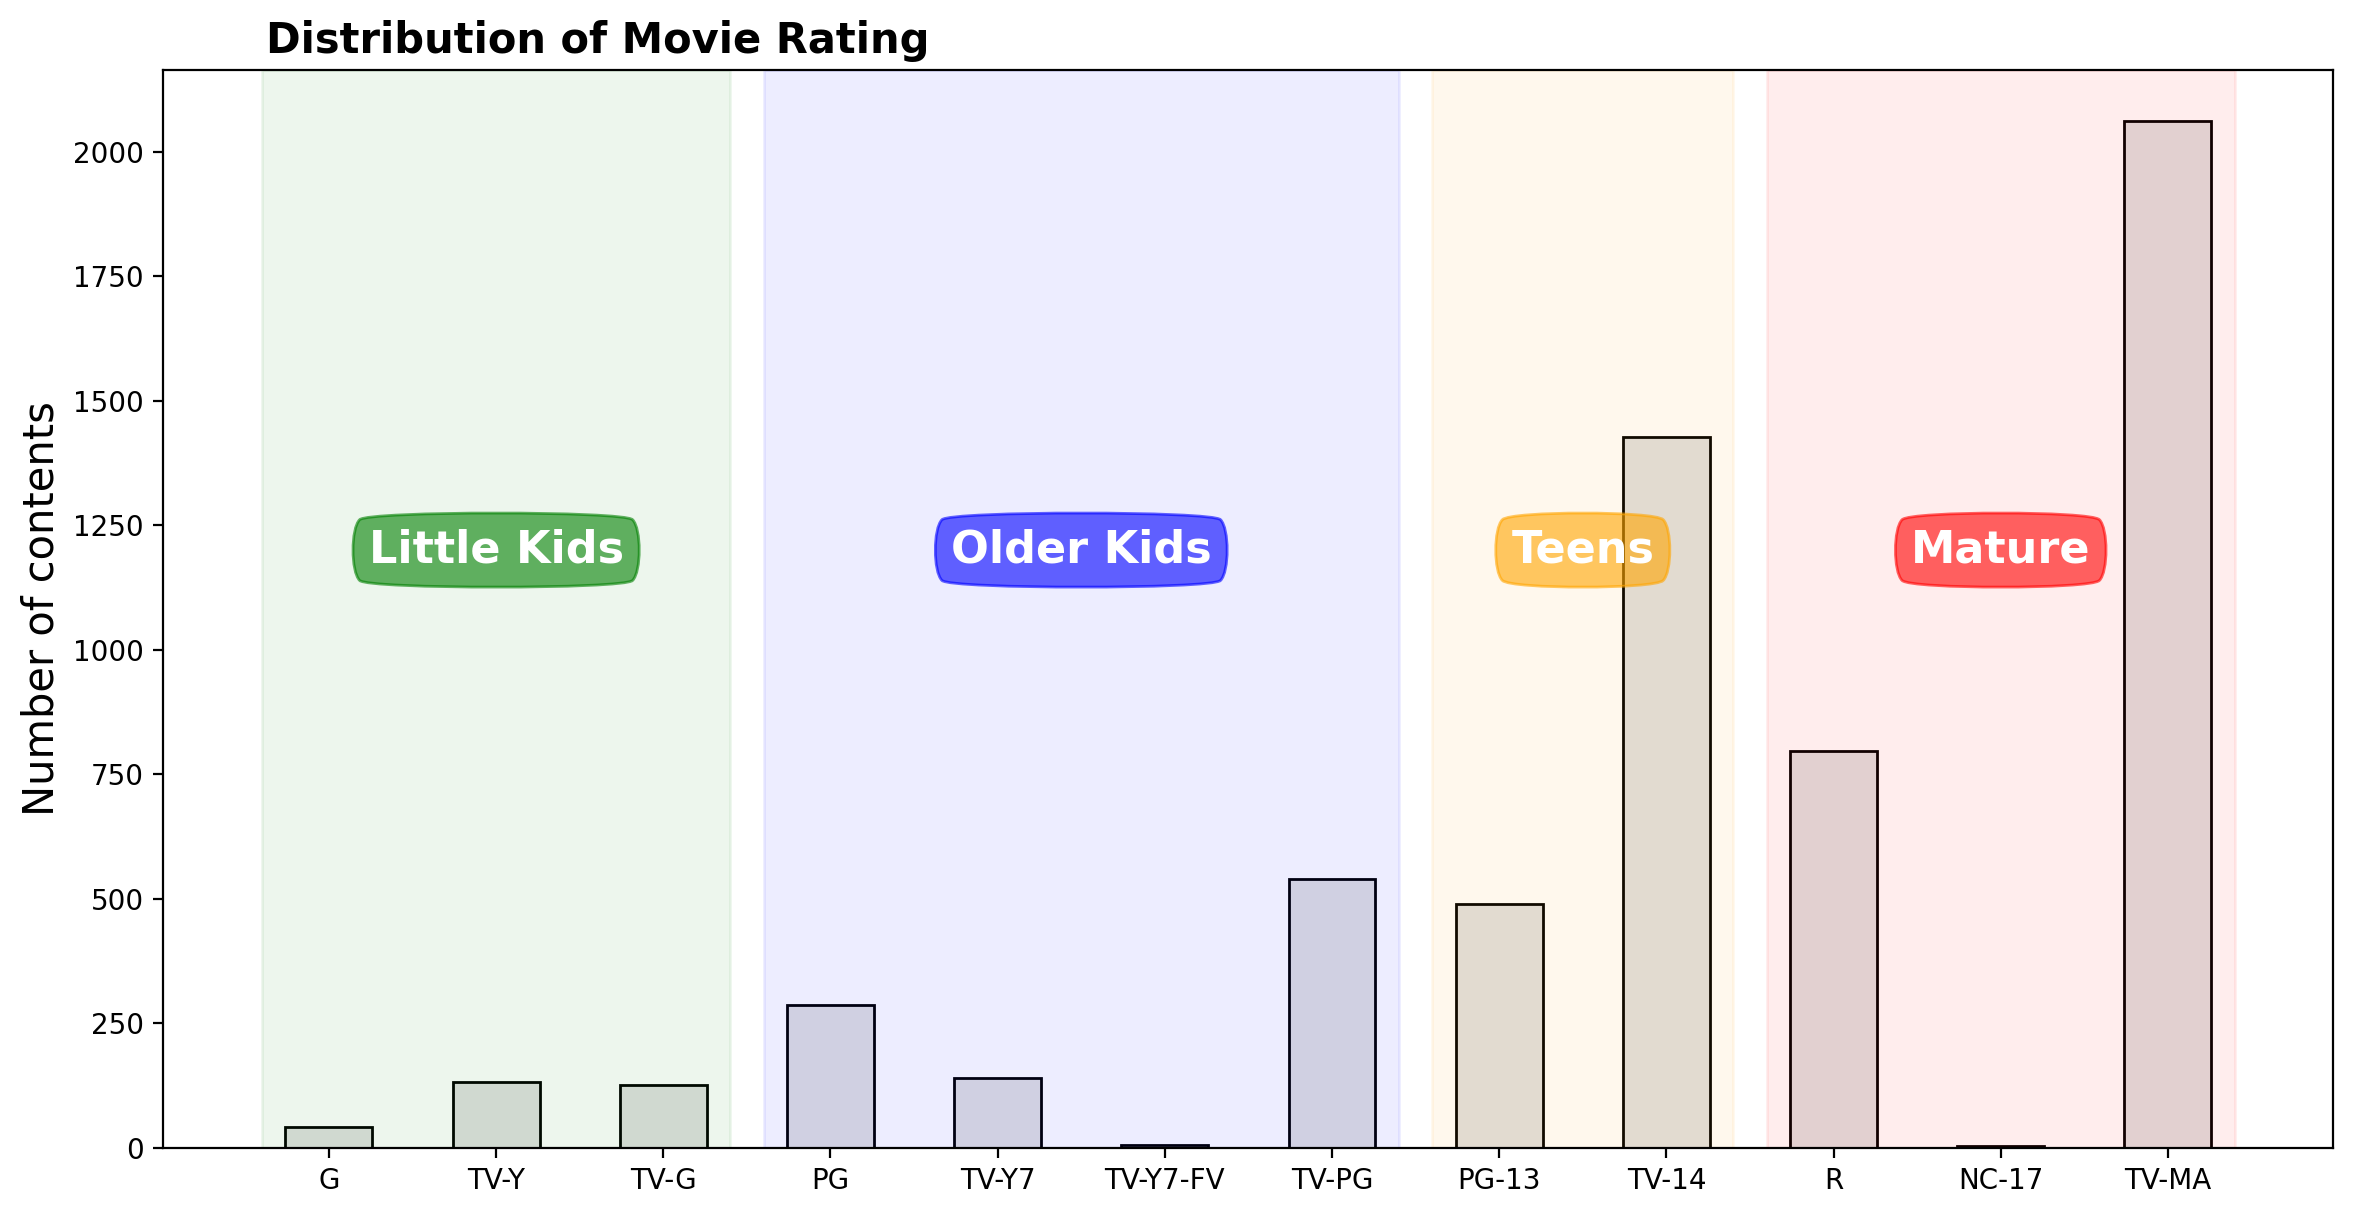

In [25]:
# Create a Series of TV Show ratings counts.
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = df[df['type']=='Movie']['rating'].value_counts()[rating_order]

fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#e0e0e0", width=0.52, edgecolor='black')

color =  ['green',  'blue',  'orange',  'red']
span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

# Add Annotation and color for each ages area.
for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2 ,1200),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
    ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
ax.set_title('Distribution of Movie Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
ax.set_ylabel('Number of contents', fontsize=15)
plt.show()

### Netflix content By Ratings for TV Shows

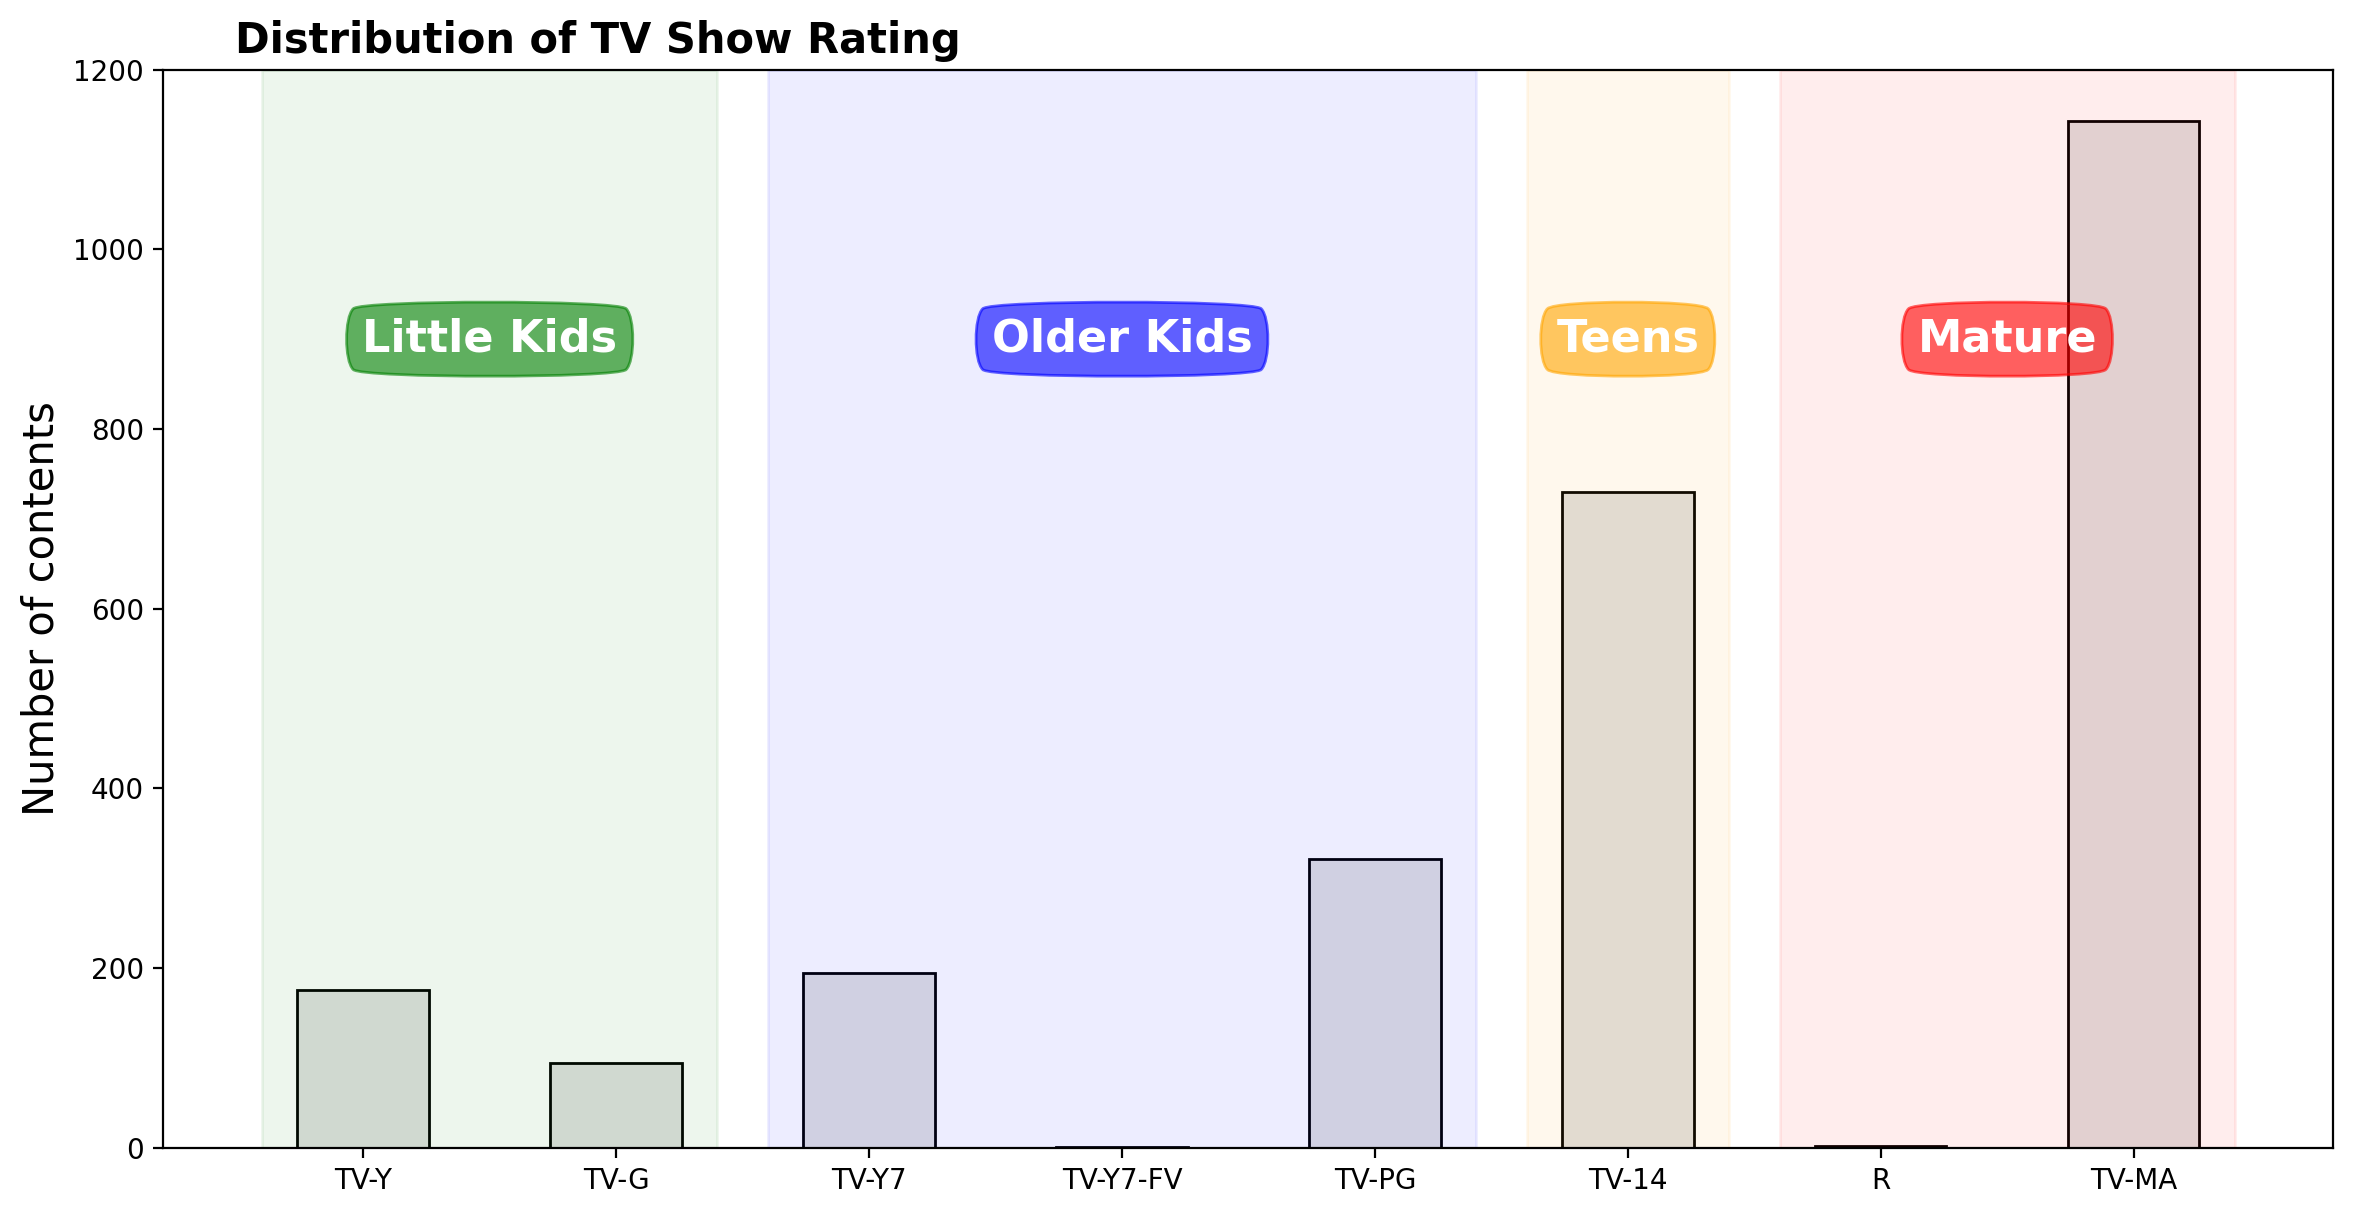

In [26]:
# Create a Series of Movie rating
rating_order =  ['TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df[df['type']=='TV Show']['rating'].value_counts()[rating_order]

# Create a barplot of movie rating for each ages.
fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#e0e0e0", width=0.52, edgecolor='black')

color =  ['green',  'blue',  'orange',  'red']
span_range = [[0, 1], [2,  4], [5, 5], [6, 7]]

# Annotate and color area of each ages.
for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2 ,900),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
    ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
ax.set_title(f'Distribution of TV Show Rating', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
ax.set_ylabel('Number of contents', fontsize=15)
plt.show()